# Topic 19 -ROC Performance Demo

In this demonstration we will continue on from where we started in topic 17. First we will train a classifier algorithm on the MNIST data set. Then we will calulate or performance metrics and analyse these using a ROC curve.

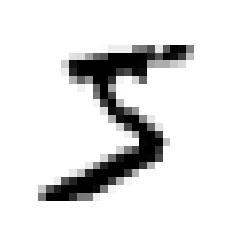

Precision: 0.8370879772350012
Recall: 0.6511713705958311
F1 Score: 0.7325171197343846


In [9]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

import matplotlib as mpl
import matplotlib.pyplot as plt

X, y = mnist["data"], mnist["target"]

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

import numpy as np
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits
y_test_5 = (y_test == 5)

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

from sklearn.metrics import precision_score, recall_score
print("Precision:",precision_score(y_train_5, y_train_pred)) # == 3530 / (3530 + 1891)
print("Recall:", recall_score(y_train_5, y_train_pred)) # == 3530 / (3530 + 687)

from sklearn.metrics import f1_score
print("F1 Score:",f1_score(y_train_5, y_train_pred))


Now we can calculate the scores used to analyse the recall-precision trade-off. We will done by setting the method to "decision_function". The scores can then be used to calulate the precision and recalls for the range of thresholds used by the classifier.

In [10]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
method="decision_function")

from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Now we can plot the recalls and precisions against threhold values to understand the nature of the trade-off. We will define a function that will print the two data series. 

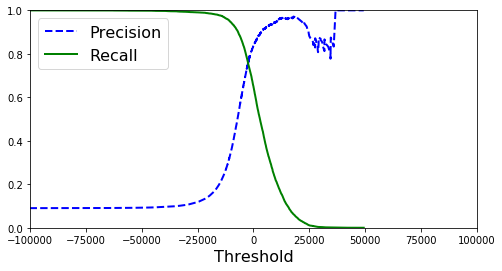

In [4]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-100000, 100000])
plt.show()

Likewise, we can plot the precision against the recall. The area under this curve indicates the performance. A good classifier will have a curve that sits in the top-right corner.

We have defined a function to plot the curve.

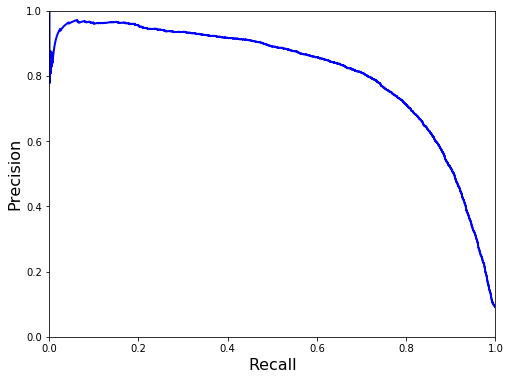

In [5]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

Finally we will plot the ROC curve. 

The ROC curve plots the *true positive rate* (another name for recall) against the *false positive rate (FPR)* 

Once again there is a trade-off: the higher the recall (TPR), the more false positive 
(FPR) the classifier produces for the set of thresholds.

We will define a function that plots the ROC curve.

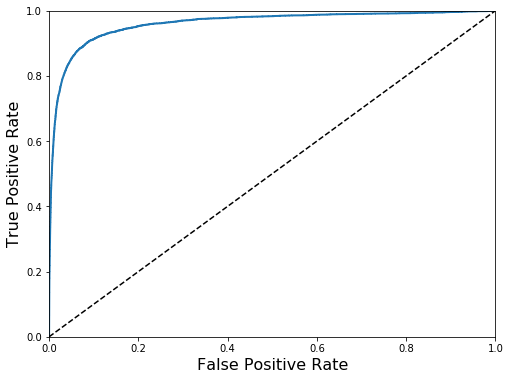

In [7]:
from sklearn.metrics import roc_curve
#We need to calculate hte fpt,tpr and retrieve the thresholds
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores) 

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

We can calculate the area under the curve (AUC) value using the builtin python function.

In [8]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616